# AI driven threat detection

In [1]:
import numpy as np, pandas as pd, os

## Exploratory Data Analysis

Load the files

In [2]:
dataframes = []
for file in os.listdir(os.path.join('Data', 'web-ids23')):
    dataframe = pd.read_csv(os.path.join('Data', 'web-ids23', file))
    dataframes.append(dataframe)

Combine the dataframes into a single dataframe

In [3]:
df = pd.concat(dataframes, ignore_index = True)
del dataframes

In [4]:
df

,uid,ts,id.orig_h,id.resp_h,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic_direction,attack,attack_type
0,b_CfXdFr3sW9WsL5f6uf,2023-07-05 02:17:29.148539904,192.168.100.115,192.168.100.209,dns,0.009682,2.0,2.0,2.0,2.0,...,0.0,0.0,39661.472481,0.0,0.0,0.0,0.0,client->server,benign,benign
1,b_CL7sGY2RVAyREp3Am4,2023-07-05 02:17:29.148770048,192.168.100.115,192.168.100.209,dns,0.009523,2.0,2.0,2.0,2.0,...,0.0,0.0,40323.787892,0.0,0.0,0.0,0.0,client->server,benign,benign
2,b_C5f3vd3d5SrErNlLo3,2023-07-05 02:17:29.152014080,192.168.100.49,192.168.100.209,dns,0.005879,2.0,2.0,2.0,2.0,...,0.0,0.0,65318.060508,0.0,0.0,0.0,0.0,client->server,benign,benign
3,b_CsFkinVMGxastE8Lf,2023-07-05 02:17:29.152171008,192.168.100.49,192.168.100.209,dns,0.005754,2.0,2.0,2.0,2.0,...,0.0,0.0,66736.253253,0.0,0.0,0.0,0.0,client->server,benign,benign
4,b_CUi4ud060SmDrSaxf,2023-07-05 02:17:29.176791808,192.168.100.104,192.168.100.209,dns,0.002935,2.0,2.0,2.0,2.0,...,0.0,0.0,130827.125010,0.0,0.0,0.0,0.0,client->server,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059744,a_CDzq4b2FZaH3Zlyuq5,2023-08-16 12:37:44.893639936,192.168.100.115,192.168.100.218,http,0.204463,6.0,5.0,1.0,1.0,...,0.0,0.0,5829.905511,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059745,a_CZx98u3rcvHmX2FD4i,2023-08-16 12:37:44.895736064,192.168.100.115,192.168.100.218,http,0.202358,6.0,5.0,1.0,1.0,...,0.0,0.0,5905.375405,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059746,a_CsQDsK2mDyF8LRWp63,2023-08-16 12:37:44.898850048,192.168.100.115,192.168.100.218,http,0.203216,6.0,5.0,1.0,1.0,...,0.0,0.0,5880.440289,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059747,a_CKBwSdzUBnOdFiQPf,2023-08-16 12:37:44.898936064,192.168.100.115,192.168.100.218,http,0.207139,6.0,5.0,1.0,1.0,...,0.0,0.0,5624.242246,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http


In [5]:
df.dtypes

uid                          object
ts                           object
id.orig_h                    object
id.resp_h                    object
service                      object
flow_duration               float64
fwd_pkts_tot                float64
bwd_pkts_tot                float64
fwd_data_pkts_tot           float64
bwd_data_pkts_tot           float64
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
flow_pkts_per_sec           float64
down_up_ratio               float64
fwd_header_size_tot         float64
fwd_header_size_min         float64
fwd_header_size_max         float64
bwd_header_size_tot         float64
bwd_header_size_min         float64
bwd_header_size_max         float64
flow_FIN_flag_count         float64
flow_SYN_flag_count         float64
flow_RST_flag_count         float64
fwd_PSH_flag_count          float64
bwd_PSH_flag_count          float64
flow_ACK_flag_count         float64
fwd_URG_flag_count          float64
bwd_URG_flag_count          

Replace nans with -1

In [6]:
df.fillna(-1, inplace = True)

In [7]:
df.describe()

,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,down_up_ratio,fwd_header_size_tot,...,flow_ACK_flag_count,fwd_URG_flag_count,bwd_URG_flag_count,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size
count,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,...,1.205975e+07,12059749.0,12059749.0,12059749.0,12059749.0,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07,1.205975e+07
mean,2.887582e+00,3.465974e+00,3.371959e+00,9.247107e-01,1.756895e+00,2.333160e+03,2.330526e+03,4.663686e+03,6.956834e-01,1.031204e+02,...,5.265331e+00,0.0,0.0,0.0,0.0,3.135364e+04,1.688896e+04,1.588892e+04,9.454368e+02,1.248782e+02
std,3.184644e+01,1.501475e+01,4.261168e+01,1.013560e+01,4.154711e+01,4.014033e+03,3.892716e+03,7.846219e+03,4.502024e-01,4.282041e+02,...,2.906482e+01,0.0,0.0,0.0,0.0,1.444444e+06,2.764727e+04,2.771558e+04,2.269808e+03,6.548562e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,...,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.024000e+03,0.000000e+00,5.070000e+02,0.000000e+00
50%,2.140000e-04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.736575e+01,5.739937e+01,1.153950e+02,1.000000e+00,2.400000e+01,...,1.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,1.024000e+03,0.000000e+00,1.024000e+03,0.000000e+00
75%,2.457900e-02,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,4.202709e+03,4.202709e+03,8.405419e+03,1.000000e+00,6.400000e+01,...,1.000000e+00,0.0,0.0,0.0,0.0,5.382972e+02,1.024000e+03,0.000000e+00,1.024000e+03,0.000000e+00
max,1.247453e+04,1.220000e+04,2.588100e+04,1.220000e+04,2.588100e+04,2.097152e+06,3.495253e+05,2.097152e+06,1.036503e+01,1.855120e+05,...,1.014200e+04,0.0,0.0,0.0,0.0,7.308575e+08,6.489600e+04,6.553500e+04,6.553500e+04,6.553500e+04


Store the attack types and attack labels

In [8]:
attack_types = df['attack_type'].unique()
attack_labels = df['attack'].unique()

Drop the uid and ts fields since they don't include important information for the classification

In [9]:
df.drop(columns = ['uid', 'ts'], axis = 1, inplace = True)
df

,id.orig_h,id.resp_h,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic_direction,attack,attack_type
0,192.168.100.115,192.168.100.209,dns,0.009682,2.0,2.0,2.0,2.0,206.570169,206.570169,...,0.0,0.0,39661.472481,0.0,0.0,0.0,0.0,client->server,benign,benign
1,192.168.100.115,192.168.100.209,dns,0.009523,2.0,2.0,2.0,2.0,210.019729,210.019729,...,0.0,0.0,40323.787892,0.0,0.0,0.0,0.0,client->server,benign,benign
2,192.168.100.49,192.168.100.209,dns,0.005879,2.0,2.0,2.0,2.0,340.198232,340.198232,...,0.0,0.0,65318.060508,0.0,0.0,0.0,0.0,client->server,benign,benign
3,192.168.100.49,192.168.100.209,dns,0.005754,2.0,2.0,2.0,2.0,347.584652,347.584652,...,0.0,0.0,66736.253253,0.0,0.0,0.0,0.0,client->server,benign,benign
4,192.168.100.104,192.168.100.209,dns,0.002935,2.0,2.0,2.0,2.0,681.391276,681.391276,...,0.0,0.0,130827.125010,0.0,0.0,0.0,0.0,client->server,benign,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059744,192.168.100.115,192.168.100.218,http,0.204463,6.0,5.0,1.0,1.0,29.345162,24.454302,...,0.0,0.0,5829.905511,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059745,192.168.100.115,192.168.100.218,http,0.202358,6.0,5.0,1.0,1.0,29.650420,24.708684,...,0.0,0.0,5905.375405,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059746,192.168.100.115,192.168.100.218,http,0.203216,6.0,5.0,1.0,1.0,29.525223,24.604353,...,0.0,0.0,5880.440289,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http
12059747,192.168.100.115,192.168.100.218,http,0.207139,6.0,5.0,1.0,1.0,28.966054,24.138379,...,0.0,0.0,5624.242246,64896.0,64320.0,502.0,502.0,client->server,attack,dos_http


## Encode non-numerical fields

In [10]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == 'O':
        print(column)
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].astype(str))

id.orig_h
id.resp_h
service
traffic_direction
attack
attack_type


In [11]:
df

,id.orig_h,id.resp_h,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,flow_CWR_flag_count,flow_ECE_flag_count,payload_bytes_per_second,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,bwd_last_window_size,traffic_direction,attack,attack_type
0,1,1291,2,0.009682,2.0,2.0,2.0,2.0,206.570169,206.570169,...,0.0,0.0,39661.472481,0.0,0.0,0.0,0.0,2,1,0
1,1,1291,2,0.009523,2.0,2.0,2.0,2.0,210.019729,210.019729,...,0.0,0.0,40323.787892,0.0,0.0,0.0,0.0,2,1,0
2,10,1291,2,0.005879,2.0,2.0,2.0,2.0,340.198232,340.198232,...,0.0,0.0,65318.060508,0.0,0.0,0.0,0.0,2,1,0
3,10,1291,2,0.005754,2.0,2.0,2.0,2.0,347.584652,347.584652,...,0.0,0.0,66736.253253,0.0,0.0,0.0,0.0,2,1,0
4,0,1291,2,0.002935,2.0,2.0,2.0,2.0,681.391276,681.391276,...,0.0,0.0,130827.125010,0.0,0.0,0.0,0.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059744,1,1300,5,0.204463,6.0,5.0,1.0,1.0,29.345162,24.454302,...,0.0,0.0,5829.905511,64896.0,64320.0,502.0,502.0,2,0,3
12059745,1,1300,5,0.202358,6.0,5.0,1.0,1.0,29.650420,24.708684,...,0.0,0.0,5905.375405,64896.0,64320.0,502.0,502.0,2,0,3
12059746,1,1300,5,0.203216,6.0,5.0,1.0,1.0,29.525223,24.604353,...,0.0,0.0,5880.440289,64896.0,64320.0,502.0,502.0,2,0,3
12059747,1,1300,5,0.207139,6.0,5.0,1.0,1.0,28.966054,24.138379,...,0.0,0.0,5624.242246,64896.0,64320.0,502.0,502.0,2,0,3


In [12]:
df.dtypes

id.orig_h                     int64
id.resp_h                     int64
service                       int64
flow_duration               float64
fwd_pkts_tot                float64
bwd_pkts_tot                float64
fwd_data_pkts_tot           float64
bwd_data_pkts_tot           float64
fwd_pkts_per_sec            float64
bwd_pkts_per_sec            float64
flow_pkts_per_sec           float64
down_up_ratio               float64
fwd_header_size_tot         float64
fwd_header_size_min         float64
fwd_header_size_max         float64
bwd_header_size_tot         float64
bwd_header_size_min         float64
bwd_header_size_max         float64
flow_FIN_flag_count         float64
flow_SYN_flag_count         float64
flow_RST_flag_count         float64
fwd_PSH_flag_count          float64
bwd_PSH_flag_count          float64
flow_ACK_flag_count         float64
fwd_URG_flag_count          float64
bwd_URG_flag_count          float64
flow_CWR_flag_count         float64
flow_ECE_flag_count         

Check data imbalances

In [13]:
X, y = df.drop(labels = ['attack_type', 'attack'], axis = 1), df['attack_type'] #keep the attack type only
del df # to free some memory

In [14]:
class_counts = []
unique_labels = y.unique()
unique_labels.sort()

for label in unique_labels:
    class_counts.append(y[y==label].count())

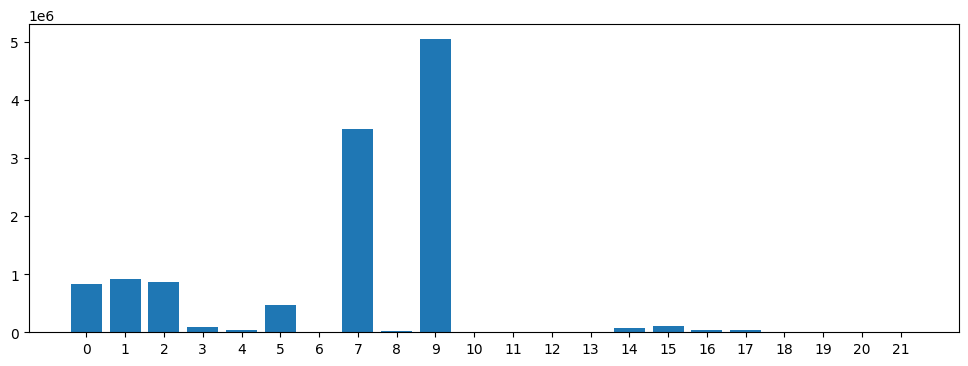

0: benign
1: bruteforce_http
2: bruteforce_https
3: dos_http
4: dos_https
5: ftp_login
6: ftp_version
7: hostsweep_Pn
8: hostsweep_sn
9: portscan
10: revshell_http
11: revshell_https
12: smtp_enum
13: smtp_version
14: sql_injection_http
15: sql_injection_https
16: ssh_login
17: ssh_login_successful
18: ssrf_http
19: ssrf_https
20: xss_http
21: xss_https


In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize = (12, 4))
plt.bar(unique_labels.astype(str), class_counts)
plt.show()
unique_labels_decoded = encoder.inverse_transform(unique_labels)
for label, decoded in zip(unique_labels, unique_labels_decoded):
    print(f'{label}: {decoded}')

Calculate the weights each class should have

In [16]:
from sklearn.utils import compute_class_weight
class_weight = compute_class_weight(class_weight = 'balanced', classes = unique_labels, y = y)
class_weight_dic = {}
for key in unique_labels:
    class_weight_dic[key] = class_weight[key]

In [17]:
class_weight, class_weight_dic

(array([6.64298406e-01, 6.00732720e-01, 6.33630719e-01, 6.34140889e+00,
        1.65032035e+01, 1.17061643e+00, 4.69002746e+01, 1.56965890e-01,
        2.42156827e+01, 1.08625903e-01, 6.41209977e+01, 5.82911962e+01,
        7.83100584e+04, 4.82841900e+01, 7.37779824e+00, 5.34362483e+00,
        1.59914353e+01, 1.60068449e+01, 9.95045215e+01, 8.23573331e+01,
        1.20265557e+02, 1.20928835e+02]),
 {0: 0.6642984064108003,
  1: 0.6007327198824651,
  2: 0.6336307186362554,
  3: 6.34140889477354,
  4: 16.50320354922053,
  5: 1.1706164307103926,
  6: 46.90027456287723,
  7: 0.15696589031578395,
  8: 24.21568269165124,
  9: 0.10862590308645581,
  10: 64.12099767117898,
  11: 58.29119620277638,
  12: 78310.05844155845,
  13: 48.28419000184172,
  14: 7.3777982381010645,
  15: 5.343624825420232,
  16: 15.991435254555533,
  17: 16.0068448604482,
  18: 99.50452152675787,
  19: 82.3573330965909,
  20: 120.26555706250748,
  21: 120.9288350079217})

## Preprocessing

Split the data so that no information leaks from the testing set to the training set

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 100)
del X, y

Normalize the data using the standard scaler

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.shape, X_test.shape

((9044811, 34), (3014938, 34))

## PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95, random_state = 100) #keep 95% of the variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [22]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.31058859, 0.17898039, 0.13392561, 0.06924783, 0.05675309,
        0.03620593, 0.03474131, 0.0322326 , 0.03071623, 0.03064088,
        0.0280071 , 0.01971304]),
 0.9617525884954066)

In [23]:
X_train.shape, X_test.shape

((9044811, 12), (3014938, 12))

## Training

Random Forest Classifier

In [24]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay

In [25]:
from sklearn.ensemble import RandomForestClassifier

rnd_forest_clf = RandomForestClassifier(n_estimators=100, n_jobs = -1, class_weight = 'balanced')
rnd_forest_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [26]:
y_pred = rnd_forest_clf.predict(X_test)

<Figure size 2400x2400 with 0 Axes>

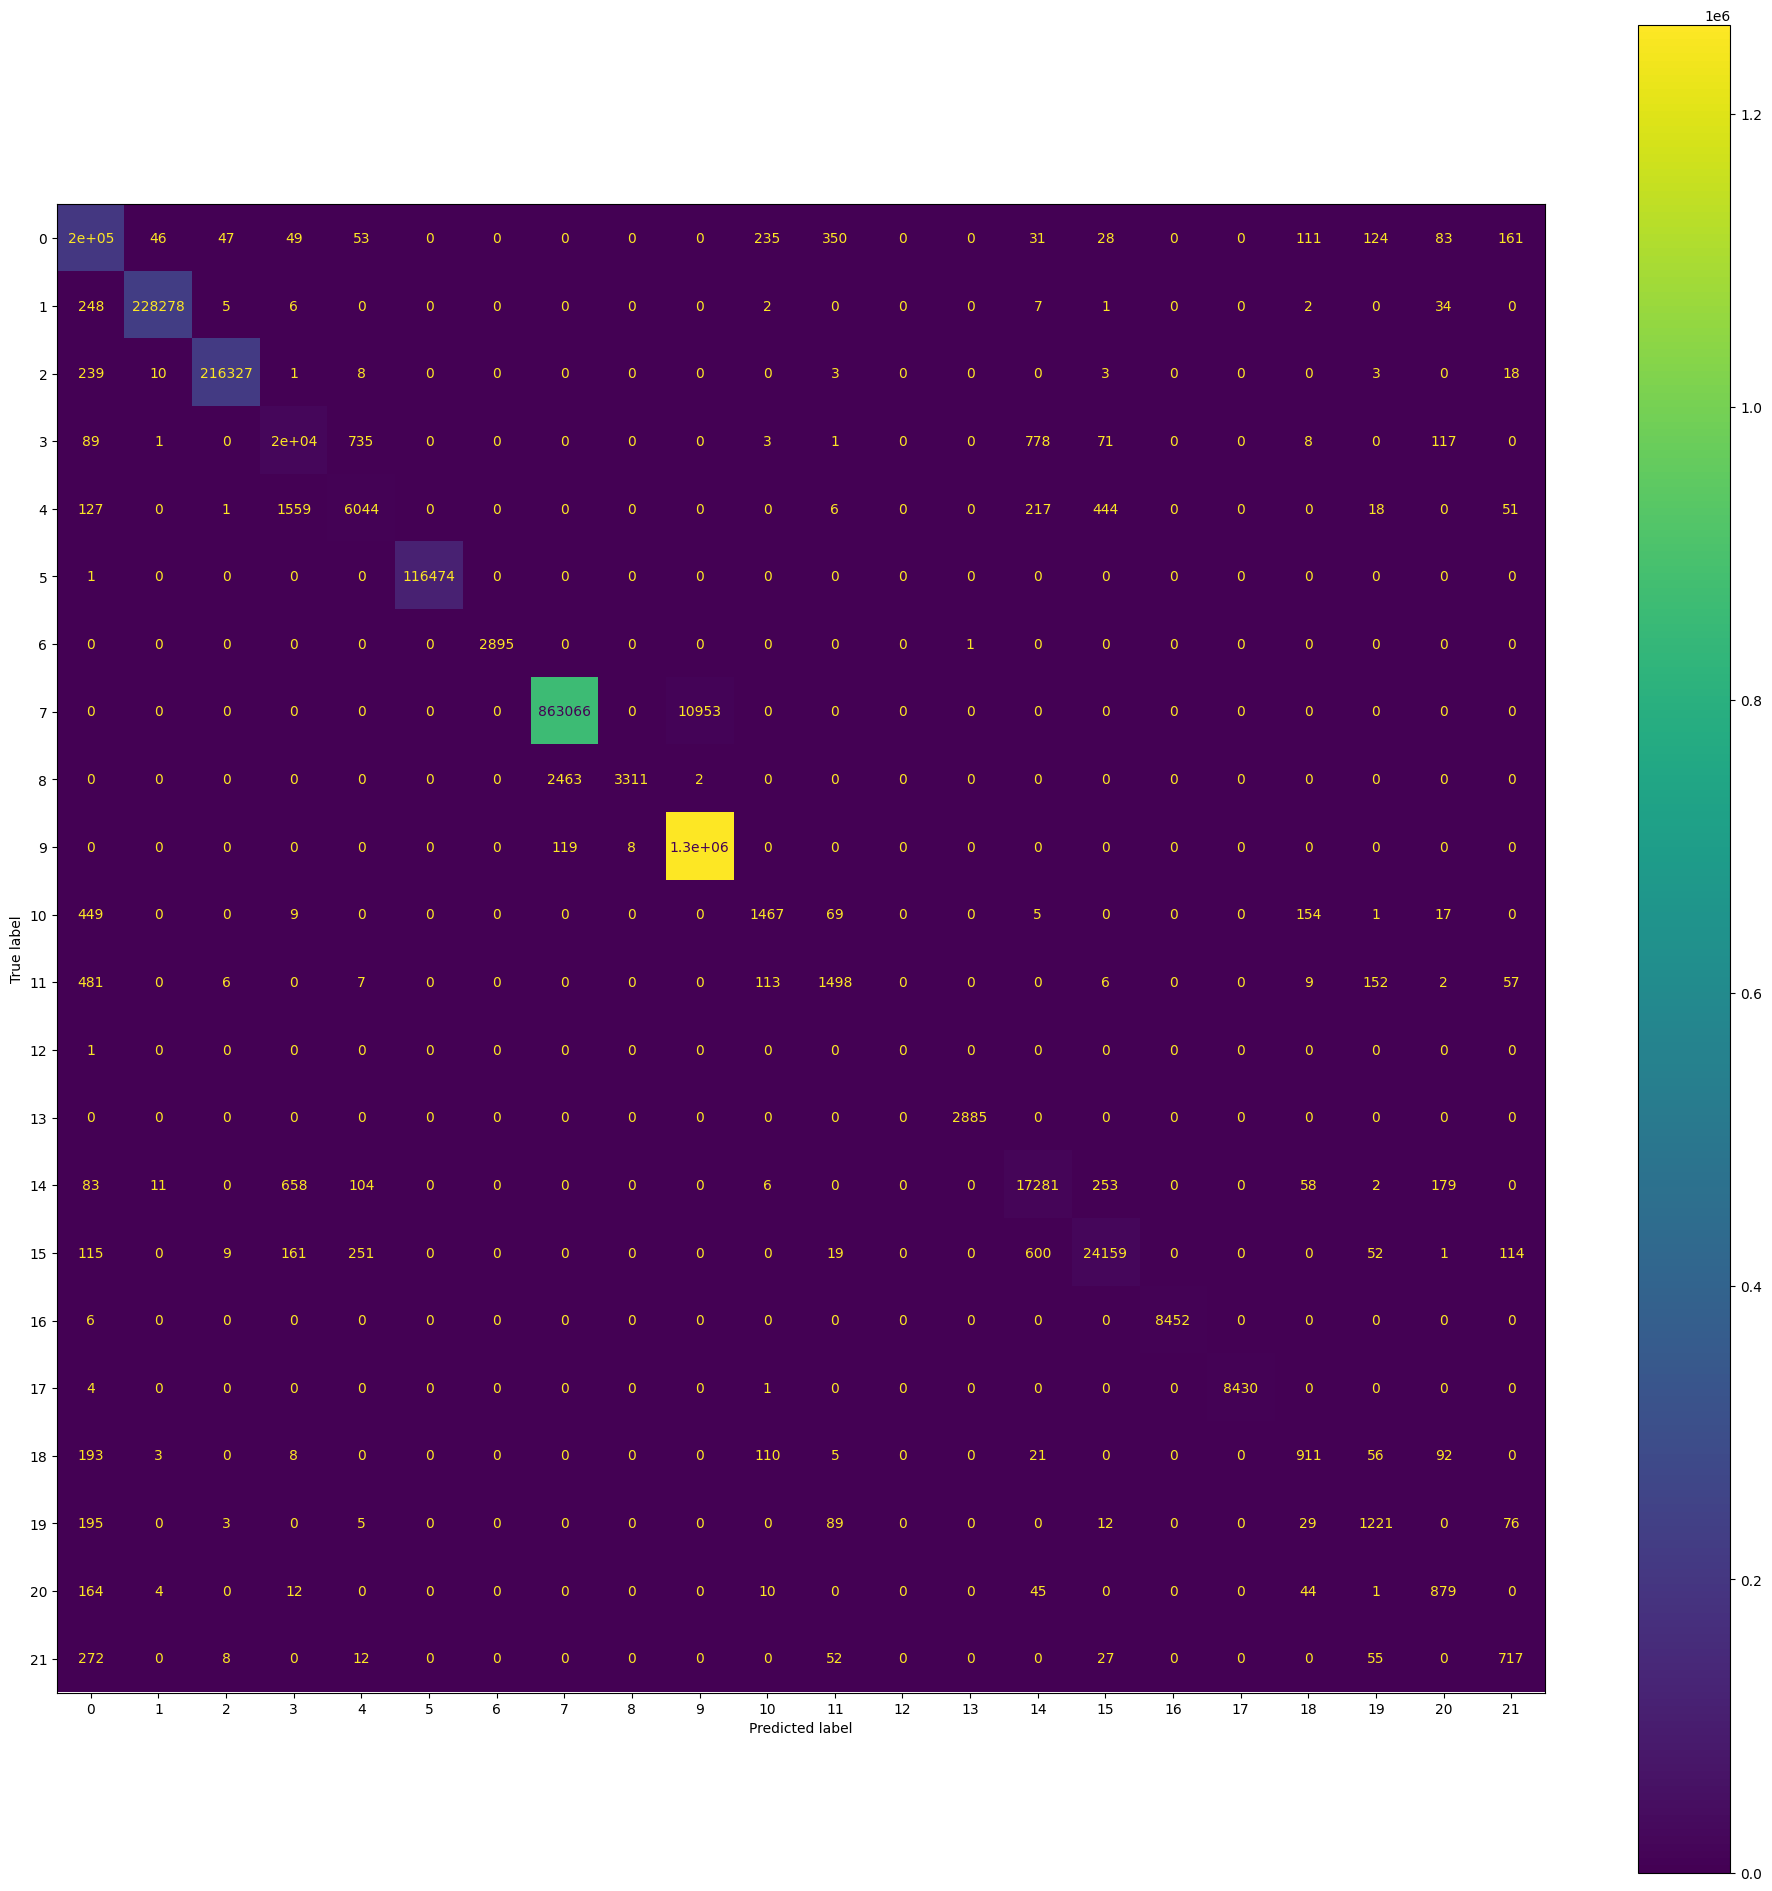

Accuracy: 0.9915391294945368
F1 score: 0.991382770902246


In [39]:
plt.figure(figsize = (24, 24))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = display.ax_.get_figure()
fig.set_figwidth(24)
fig.set_figheight(24)
plt.show()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average = 'weighted')}')

Support Vector Machine

In [23]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
svc = OneVsRestClassifier(LinearSVC(max_iter = 1000000, class_weight = 'balanced'), n_jobs = 5)
svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(class_weight='balanced',
                                        max_iter=1000000),
                    n_jobs=5)

In [51]:
y_pred = svc.predict(X_test)

<Figure size 2400x2400 with 0 Axes>

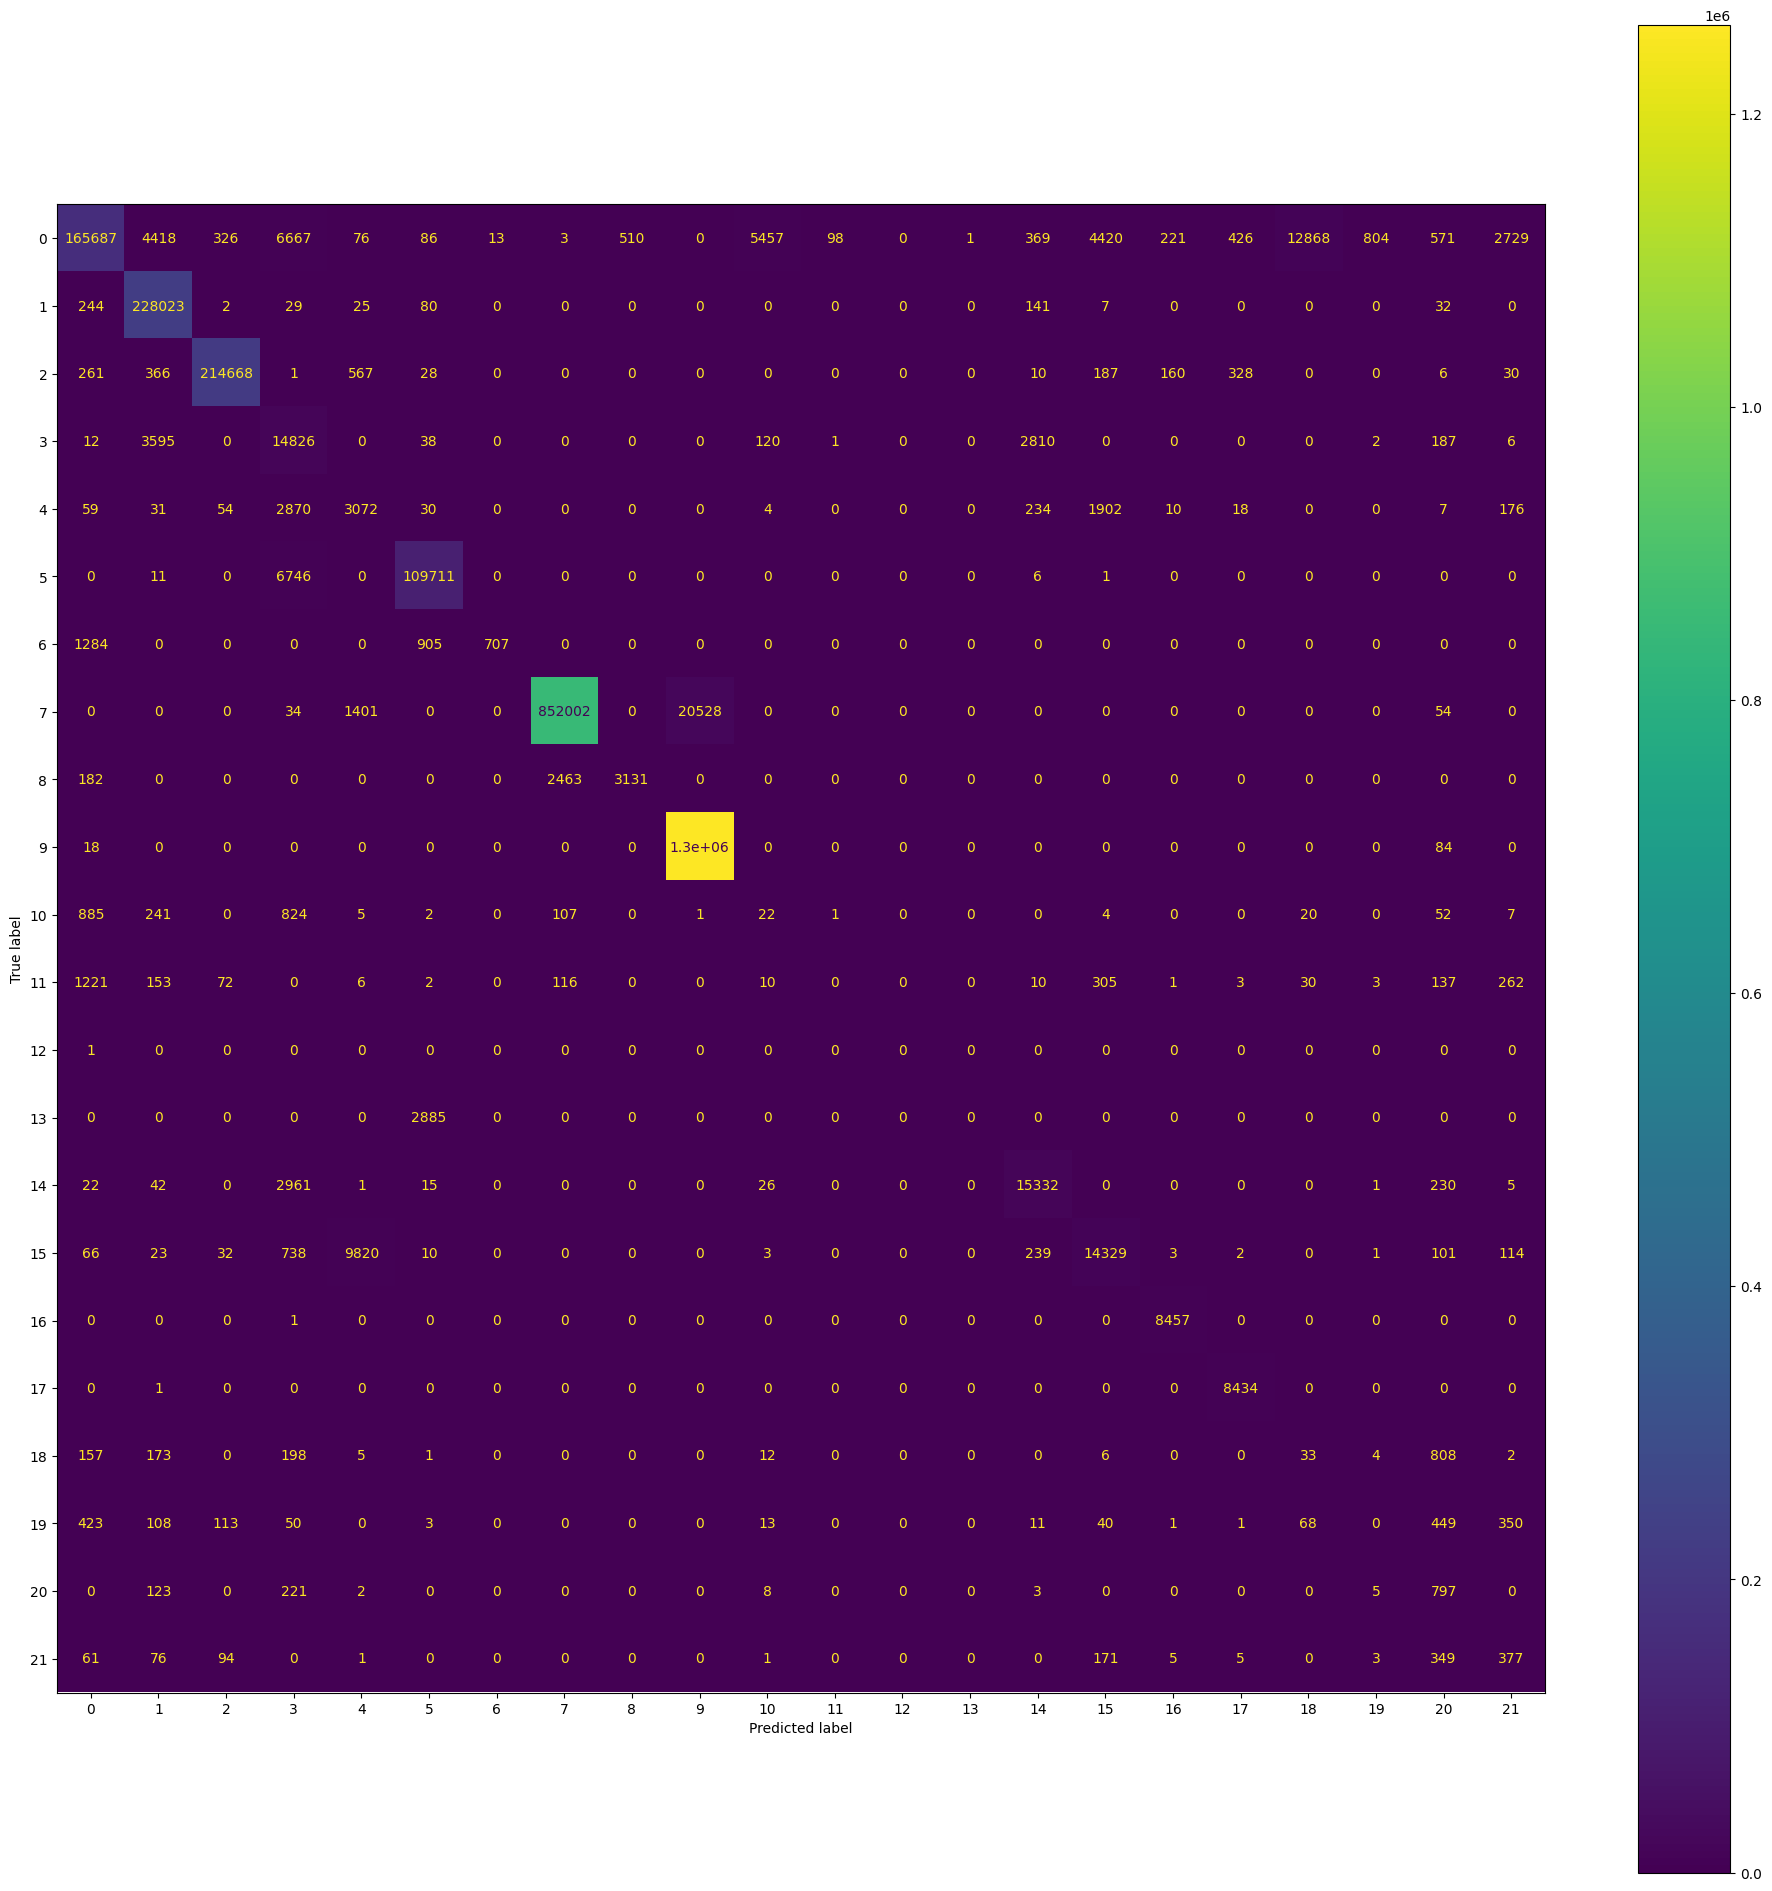

Accuracy: 0.9620565995055288
F1 score: 0.9649779292324746


In [54]:
plt.figure(figsize = (24, 24))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = display.ax_.get_figure()
fig.set_figwidth(24)
fig.set_figheight(24)
plt.show()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average = 'weighted')}')

Neural Network

In [25]:
import keras

2025-04-13 19:06:54.044636: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744560414.161932    4378 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744560414.201901    4378 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-13 19:06:54.487357: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
model = keras.models.Sequential([
    keras.layers.Input(shape = (X_train.shape[1],)),

    keras.layers.Dense(1024),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(units = unique_labels.__len__(), activation = 'softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1024)           │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,854 (2.72 MB)

 Trainable params: 709,014 (2.70 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [37]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

model.fit(
    X_train,
    y_train,
    batch_size = 1024,
    epochs = 20,
    class_weight = class_weight_dic
)

Epoch 1/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8061 - loss: 1.8117
Epoch 2/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9299 - loss: 0.7193
Epoch 3/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9528 - loss: 0.5736
Epoch 4/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9644 - loss: 0.4963
Epoch 5/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9703 - loss: 0.4595
Epoch 6/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9721 - loss: 0.4290
Epoch 7/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9740 - loss: 0.4608
Epoch 8/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9763 - loss: 0.4053
Epoch 9/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9773 - loss: 0.3823
Epoch 10/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9786 - loss: 0.3433
Epoch 11/20
8833/8833 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9794 - loss: 0.3344
Epoch 12/20
8833/88

In [ ]:
y_pred = model.predict(X_test, batch_size = 1024)

<Figure size 2400x2400 with 0 Axes>

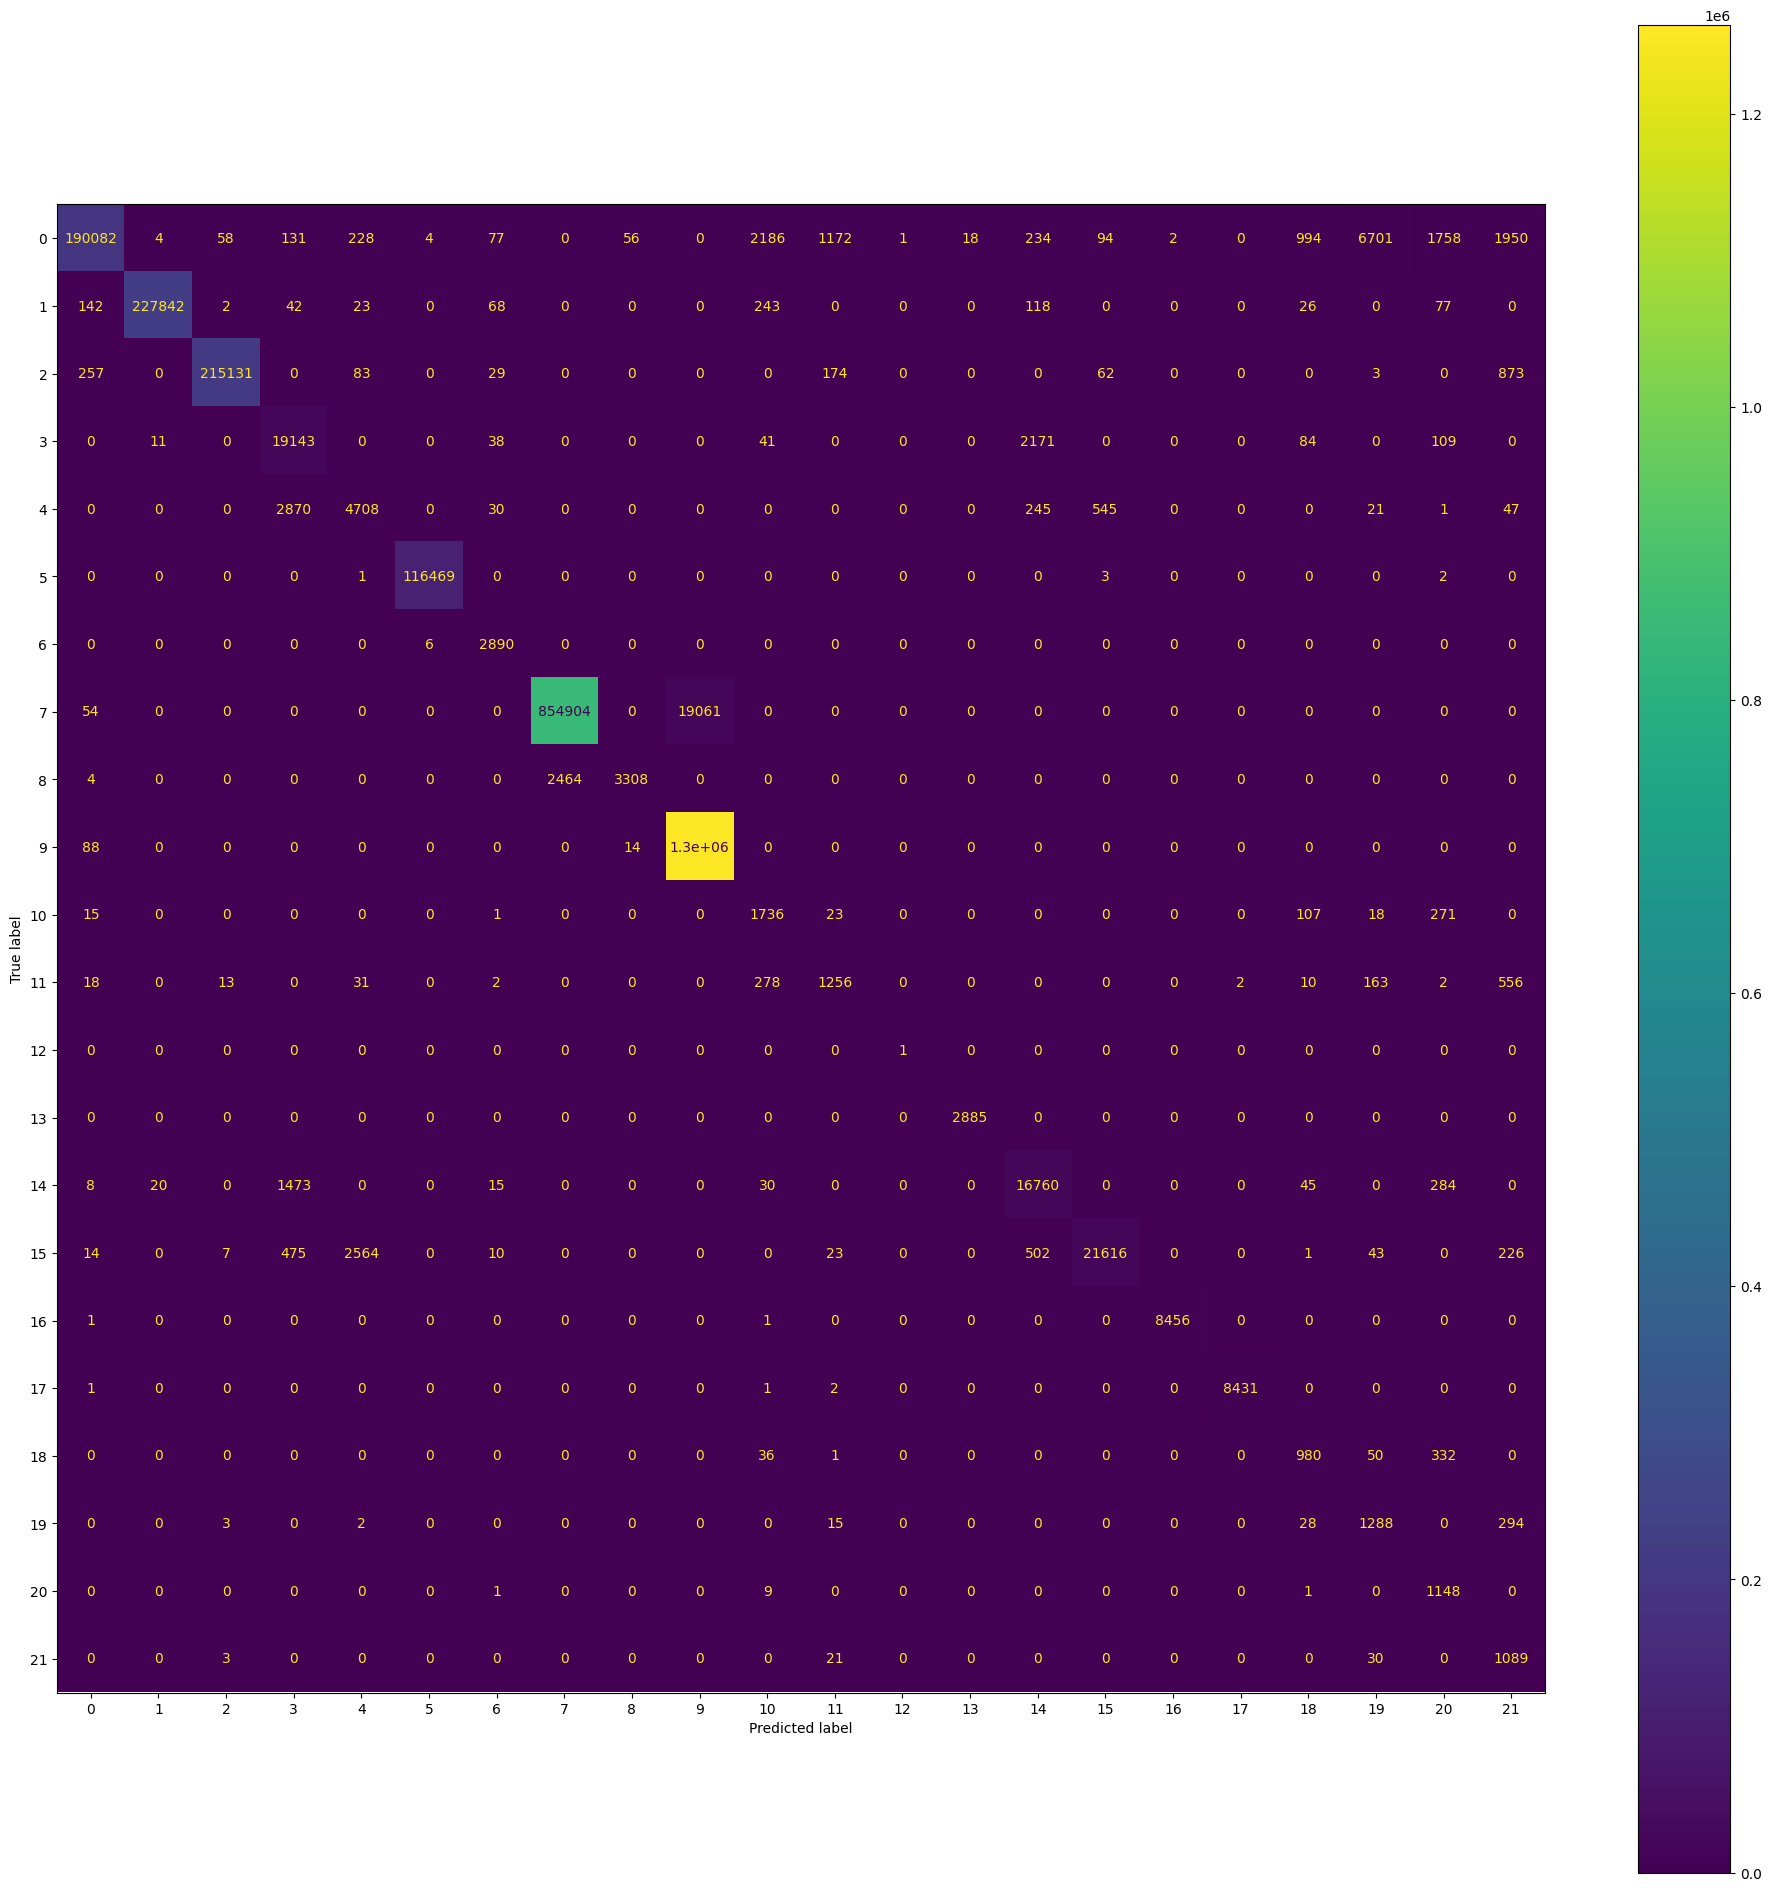

Accuracy: 0.9821283223734617
F1 score: 0.9836863795031665


In [39]:
y_pred = np.argmax(y_pred, axis = 1)
plt.figure(figsize = (24, 24))
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
fig = display.ax_.get_figure()
fig.set_figwidth(24)
fig.set_figheight(24)
plt.show()
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test, y_pred, average = 'weighted')}')